In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
df = pd.read_excel("FinalDataFrame.xlsx", engine='openpyxl')

,Mekan_Adı,Kullanıcı_Adı,Yorum,Puan,Yorum_Tarihi,Restoran_Kategorisi,Restoran_Toplam_Yorum_Sayısı,Ortalama_Restoran_Puanı,Restoran_Adresi
0,01_adanali_ismail_ustanin_yeri,güvenç tünay,Mezeler etler tavuk harika\nHizmet süper\nHarika,5,2025-07-13,Restoran,767,4.1,"Sancak, Tiflis Cd. No:41, 06550 Çankaya/Ankara"
1,01_adanali_ismail_ustanin_yeri,Ali Can Vurgun,Mezeleri temizliği yemeklerin lezzeti harikadi...,5,2025-06-20,Restoran,767,4.1,"Sancak, Tiflis Cd. No:41, 06550 Çankaya/Ankara"
2,01_adanali_ismail_ustanin_yeri,Pelin Yildirim,Resmen dolandırıldık. Yani bunu başka türlü aç...,1,2025-06-20,Restoran,767,4.1,"Sancak, Tiflis Cd. No:41, 06550 Çankaya/Ankara"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171042 entries, 0 to 171041
Data columns (total 9 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Mekan_Adı                     171042 non-null  object        
 1   Kullanıcı_Adı                 171041 non-null  object        
 2   Yorum                         171042 non-null  object        
 3   Puan                          171042 non-null  int64         
 4   Yorum_Tarihi                  171042 non-null  datetime64[ns]
 5   Restoran_Kategorisi           171042 non-null  object        
 6   Restoran_Toplam_Yorum_Sayısı  171042 non-null  int64         
 7   Ortalama_Restoran_Puanı       171042 non-null  float64       
 8   Restoran_Adresi               171042 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 11.7+ MB


In [4]:
# Bir müşterinin aynı restorana aynı yorumdan birden fazla yapması durumunda, bu yorumların bir tanesinin tutulması ve kalanının silinmesi

df.drop_duplicates(subset=['Mekan_Adı', 'Kullanıcı_Adı', 'Yorum'], inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 166325 entries, 0 to 171041
Data columns (total 9 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Mekan_Adı                     166325 non-null  object        
 1   Kullanıcı_Adı                 166324 non-null  object        
 2   Yorum                         166325 non-null  object        
 3   Puan                          166325 non-null  int64         
 4   Yorum_Tarihi                  166325 non-null  datetime64[ns]
 5   Restoran_Kategorisi           166325 non-null  object        
 6   Restoran_Toplam_Yorum_Sayısı  166325 non-null  int64         
 7   Ortalama_Restoran_Puanı       166325 non-null  float64       
 8   Restoran_Adresi               166325 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 12.7+ MB


Bir müşterinin aynı restorana aynı yorumu birden fazla kez yapmış olabileceği gözetilerek, söz konusu yorumlar veriden çıkarılmıştır. Anılan işlem sonrasında 171.042 olan yorum adedi 166.325'e gerilemiştir.

# Temel İstatistikler

In [6]:
# Toplam Restoran Sayısı
total_restaurants = df['Mekan_Adı'].nunique()
print(f"Toplam Restoran Sayısı: {total_restaurants}")

# Toplam Yorum Sayısı
total_reviews = df.groupby('Mekan_Adı').size().sum()
print(f"Toplam Yorum Sayısı: {total_reviews}")

Toplam Restoran Sayısı: 2475
Toplam Yorum Sayısı: 166325


In [7]:
# Restoranların Kategorilere Göre Dağılımı
category_counts = df['Restoran_Kategorisi'].value_counts()
print("Restoranların Kategorilere Göre Dağılımı:")
print(category_counts)

Restoranların Kategorilere Göre Dağılımı:
Restoran_Kategorisi
Restoran            154715
Tatlı & Kahve         3887
Fast Food             3151
Other                 2743
Dünya Mutfakları      1191
İçki Mekanları         638
Name: count, dtype: int64


In [8]:
# Restoranların Yorum Tarihlerine Göre Dağılımı
df['Yorum_Tarihi'] = pd.to_datetime(df['Yorum_Tarihi'], errors='coerce')
df['Yorum_Yılı'] = df['Yorum_Tarihi'].dt.year
yearly_review_counts = df['Yorum_Yılı'].value_counts().sort_index()
percentage = (yearly_review_counts / total_reviews * 100).round(2)
yearly_review_df = pd.DataFrame({
    'Yorum_Sayısı': yearly_review_counts,
    'Yüzde': percentage
})
print("Yorumların Yıllara Göre Dağılımı:")
print(yearly_review_df)

Yorumların Yıllara Göre Dağılımı:
            Yorum_Sayısı  Yüzde
Yorum_Yılı                     
2012                   1   0.00
2013                   6   0.00
2014                   6   0.00
2015                  12   0.01
2016                  33   0.02
2017                 212   0.13
2018                 900   0.54
2019                2241   1.35
2020                3003   1.81
2021                3831   2.30
2022                8519   5.12
2023               13314   8.00
2024               49948  30.03
2025               84299  50.68


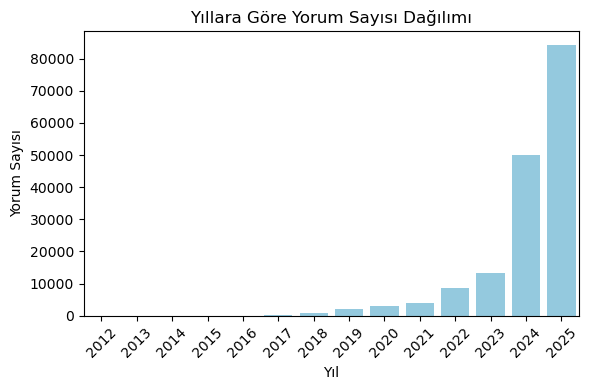

In [9]:
# Histogram oluştur
plt.figure(figsize=(6,4))
sns.barplot(x=yearly_review_df.index, y=yearly_review_df['Yorum_Sayısı'], color='skyblue')
plt.xlabel("Yıl")
plt.ylabel("Yorum Sayısı")
plt.title("Yıllara Göre Yorum Sayısı Dağılımı")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
df = df[df['Yorum_Yılı'] > 2018]
df.reset_index(drop=True, inplace=True)

In [12]:
df.shape

(165155, 10)

Yorum yılı 2018 ve daha eski olan yorumlar veriden çıkarılmıştır. Söz konusu yorumların güncelliğini yitirdiği ve doğru olmayan öngörülere sebebiyet verebileceği görüşü edinilmiştir. Söz konusu grup toplam yorumların yaklaşık %1'ine denk gelmektedir. Anılan işlem sonrasında 166.325 olan yorum adedi 165.155'e gerilemiştir.

In [13]:
# Restoran Toplam Yorum Sayılarına Göre Dağılımı
restaurant_review_counts = df[['Mekan_Adı', 'Restoran_Toplam_Yorum_Sayısı']].drop_duplicates()

percentiles = restaurant_review_counts['Restoran_Toplam_Yorum_Sayısı'].quantile([0.01, 0.02, 0.03, 0.04, 0.05, 0.10, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
print("Restoranların Toplam Yorum Sayılarına Göre Dağılımı:")
print(percentiles)

Restoranların Toplam Yorum Sayılarına Göre Dağılımı:
0.01      13.00
0.02      15.00
0.03      18.00
0.04      21.00
0.05      25.00
0.10      46.00
0.25     149.00
0.50     522.50
0.75    1150.00
0.90    2195.80
0.95    3427.45
0.99    7694.18
Name: Restoran_Toplam_Yorum_Sayısı, dtype: float64


c:\Users\Burak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


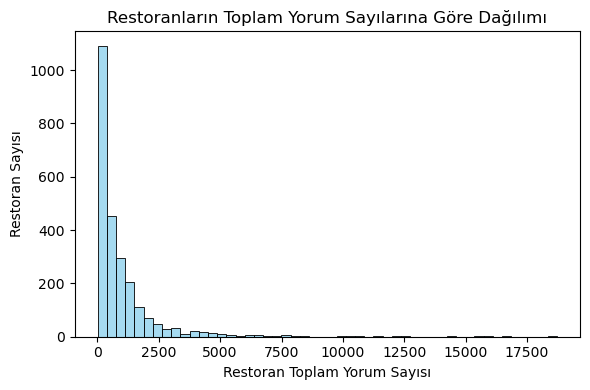

In [14]:
# Histogram oluştur
plt.figure(figsize=(6,4))
sns.histplot(restaurant_review_counts['Restoran_Toplam_Yorum_Sayısı'], bins=50, kde=False, color='skyblue')
plt.xlabel("Restoran Toplam Yorum Sayısı")
plt.ylabel("Restoran Sayısı")
plt.title("Restoranların Toplam Yorum Sayılarına Göre Dağılımı")
plt.tight_layout()
plt.show()

In [15]:
# Restoran toplam yorum adedi 13 ve daha az olan restoranların adlarını bul
low_review_restaurants = restaurant_review_counts[restaurant_review_counts['Restoran_Toplam_Yorum_Sayısı'] <= 13]['Mekan_Adı']

# Bu restoranlara ait yorumları veri setinden çıkar
df = df[~df['Mekan_Adı'].isin(low_review_restaurants)]
df.reset_index(drop=True, inplace=True)

In [16]:
df.shape

(164956, 10)

Toplam yorum adedi 13'ten az olan restoranların yorumları veriden çıkarılmıştır. Anılan restoranlar, toplam restoran yorumlarının %1'ine denk gelmektedir. Söz konusu yorumların restoran sahipleri ya da yakınları tarafından yapılmış olabileceği ve anılan durumun veri kalitesini olumsuz etkileyebileceği görüşü edinilmiştir. Anılan işlem sonrasında 165.155 olan yorum adedi 164.956'ya gerilemiştir.

In [17]:
# Yorumların Kelime Adetleri
df['Yorum_Kelime_Adedi'] = df['Yorum'].apply(lambda x: len(str(x).split()))

# Kelime adedi gruplarını oluştur
bins = [0, 1, 2, 3, 10, 50, 100, 500, np.inf]
labels = [
    '1', 
    '2', 
    '3', 
    '4-10', 
    '11-50', 
    '51-100', 
    '101-500', 
    '501+'
]
df['Kelime_Adedi_Grubu'] = pd.cut(df['Yorum_Kelime_Adedi'], bins=bins, labels=labels, right=True, include_lowest=True)
group_counts = df['Kelime_Adedi_Grubu'].value_counts().reindex(labels, fill_value=0)
print("Kelime adedi gruplarına göre yorum adedi:")
print(group_counts)

Kelime adedi gruplarına göre yorum adedi:
Kelime_Adedi_Grubu
1           4419
2           7051
3           6067
4-10       44106
11-50      87599
51-100     12542
101-500     3169
501+           3
Name: count, dtype: int64


C:\Users\Burak\AppData\Local\Temp\ipykernel_24304\13869385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Yorum_Kelime_Adedi'] = df['Yorum'].apply(lambda x: len(str(x).split()))
C:\Users\Burak\AppData\Local\Temp\ipykernel_24304\13869385.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Kelime_Adedi_Grubu'] = pd.cut(df['Yorum_Kelime_Adedi'], bins=bins, labels=labels, right=True, include_lowest=True)


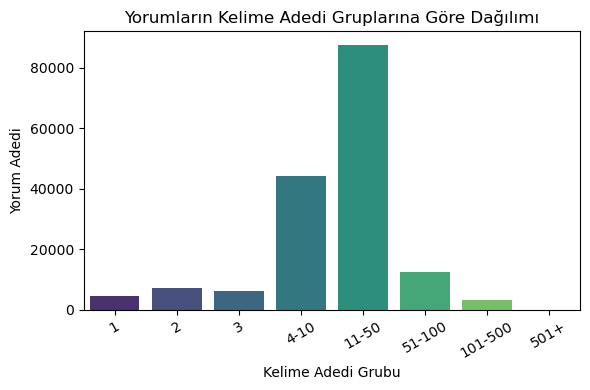

In [18]:
# Histogram oluştur
plt.figure(figsize=(6,4))
sns.barplot(x=group_counts.index, y=group_counts.values, palette="viridis")
plt.xlabel("Kelime Adedi Grubu")
plt.ylabel("Yorum Adedi")
plt.title("Yorumların Kelime Adedi Gruplarına Göre Dağılımı")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [19]:
# 2 ve daha az kelimeden oluşan yorumları veriden çıkar
df = df[df['Yorum_Kelime_Adedi'] > 2]
df.reset_index(drop=True, inplace=True)

In [20]:
df.shape

(153486, 12)

2 ve daha az kelime içeren yorumlar veriden çıkarılmıştır. Burada 2 kelime olarak belirlenmesinin sebebi; veri üzerinden gerçekleştirilen kontrollerde 3 kelimelik yorumlarda; "Meze çeşidi yok", "Hizmet kalitesi sıfır" gibi proje için anlamlı olabilecek yorumların bulunması belirleyici olmuştur. Ancak 1 ve 2 kelimeli yorumlarda çoğunlukla; "Başarılı", "Teşekkürler", "Yorum yok" gibi proje için anlamlı olmayan kelimeler yer almaktadır. Anılan işlem sonrasında 164.956 olan yorum adedi 153.486'ya gerilemiştir.

# Manipülasyon Kontrolleri

Aynı restorana kullanıcılar tarafından yapılan 3'er adet yorum incelenmiştir. Söz konusu yorumların birbirinden farklı bilgiler içermesi sebebiyle anılan yorumlar veriden çıkarılmamıştır.

In [ ]:
df.to_excel("CleanedDataFrame.xlsx", index=False, engine='openpyxl')